In [2]:
from model import *
from data import *

Using TensorFlow backend.


## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

In [2]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=200,epochs=1,callbacks=[model_checkpoint])

/home/asli/Desktop/unet-master/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("co..., inputs=Tensor("in...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/1
Found 55 images belonging to 1 classes.
Found 55 images belonging to 1 classes.
200/200 [==============================] - 1615s 8s/step - loss: 0.6888 - accuracy: 0.9896

Epoch 00001: loss improved from inf to 0.68883, saving model to unet_membrane.hdf5


### Train with npy file

In [ ]:
#imgs_train,imgs_mask_train = geneTrainNpy("data/membrane/train/aug/","data/membrane/train/aug/")
#model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

### test your model and save predicted results

In [3]:
testGene = testGenerator("data/membrane/test")
model = unet()
model.load_weights("unet_membrane.hdf5")
results = model.predict_generator(testGene,10,verbose=1)
saveResult("data/membrane/test",results)

/home/asli/Desktop/unet-master/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


10/10 [==============================] - 7s 744ms/step


/home/asli/anaconda3/envs/unet/lib/python3.5/site-packages/skimage/io/_io.py:141: UserWarning: data/membrane/test/0_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/home/asli/anaconda3/envs/unet/lib/python3.5/site-packages/skimage/io/_io.py:141: UserWarning: data/membrane/test/1_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/home/asli/anaconda3/envs/unet/lib/python3.5/site-packages/skimage/io/_io.py:141: UserWarning: data/membrane/test/2_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/home/asli/anaconda3/envs/unet/lib/python3.5/site-pa

In [7]:
set(results[0].ravel())

{0.49501356, 0.49547693}

In [13]:
import matplotlib.pyplot as plt
import collections

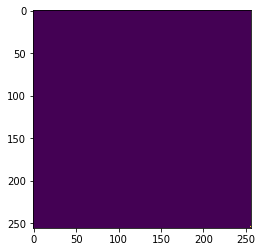

In [12]:
plt.imshow(results[0][:,:,0])

In [10]:
results[0].shape

(256, 256, 1)

In [15]:
for image in results:
    print(collections.Counter(image.ravel()))

Counter({0.49501356: 65535, 0.49547693: 1})
Counter({0.49501356: 65535, 0.49547073: 1})
Counter({0.49501356: 65535, 0.49549824: 1})
Counter({0.49501356: 65535, 0.49547473: 1})
Counter({0.49501356: 65535, 0.49553752: 1})
Counter({0.49501356: 65535, 0.49546537: 1})
Counter({0.49501356: 65535, 0.49551222: 1})
Counter({0.49501356: 65535, 0.49549204: 1})
Counter({0.49501356: 65535, 0.4955353: 1})
Counter({0.49501356: 65535, 0.49547252: 1})
